In [1]:
import pandas as pd
prices = pd.read_csv("prices_full.csv").drop(columns=['Unnamed: 0'])
prices.head()

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_90567/796720018.py:2: DtypeWarning: Columns (7,14,16,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  prices = pd.read_csv("prices_full.csv").drop(columns=['Unnamed: 0'])


,file_id,chainid,subchainid,storeid,bikoretno,priceupdatedate,itemcode,itemname,manufacturername,manufacturecountry,...,bisweighted,qtyinpackage,itemprice,unitofmeasureprice,allowdiscount,itemstatus,itemid,itemtype,lastupdatedate,lastupdatetime
0,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,2018-02-28,7290010117970,סבבה בוטנים אמריקאים 50 גרם,General,NO-CONTENT,...,0,1.0,1.7,0.0,1,0,not_apply,not_apply,unknown,unknown
1,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,2021-01-27,7290000178707,תפוצ`יפס 50גרם,General,NO-CONTENT,...,0,1.0,3.9,0.0,1,0,not_apply,not_apply,unknown,unknown
2,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,2020-04-16,7290000288413,סנו די רול און 50,General,NO-CONTENT,...,0,1.0,14.9,0.0,1,0,not_apply,not_apply,unknown,unknown
3,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,2021-04-22,7290000288420,סנו די תרסיס,General,NO-CONTENT,...,0,1.0,14.9,0.0,1,0,not_apply,not_apply,unknown,unknown
4,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,2020-06-04,7290000146997,טום וג'רי משחת שיניים בטעם מסטיק 50 מל,General,NO-CONTENT,...,0,1.0,7.9,0.0,1,0,not_apply,not_apply,unknown,unknown


In [85]:
# look into 'itemname'
prices['itemname'].isna().any()
# great! no NaN

False

In [86]:
prices['itemname'].apply(len).describe()

count    1.485012e+06
mean     2.207488e+01
std      6.988530e+00
min      1.000000e+00
25%      1.900000e+01
50%      2.000000e+01
75%      2.400000e+01
max      1.010000e+02
Name: itemname, dtype: float64

In [87]:
# look at the min and max
prices[prices['itemname'].apply(len).isin([1,101])]['itemname'].unique()


array(['מלח מטבח עבה להמלחת בשר ובישול 1 ק"ג                                                             1ק"ג',
       '2', '3', '\x7f'], dtype=object)

In [88]:
# let's clean that
prices.itemname = prices.itemname.apply(lambda x:" ".join(filter(lambda x:len(x) > 0,x.split(" "))))

In [89]:
prices['itemname'].apply(len).describe()

count    1.485012e+06
mean     2.195255e+01
std      7.029126e+00
min      1.000000e+00
25%      1.900000e+01
50%      2.000000e+01
75%      2.400000e+01
max      9.900000e+01
Name: itemname, dtype: float64

In [90]:
prices[prices['itemname'].apply(len).isin([1,99])]['itemname'].unique()

array(['שלגון שמנת מופחת שומן וקלוריות בטעם פיסטוק עם ריפל בטעם שוקולד מריר וציפוי חלקי של שוקולד חלב מעולה',
       'תרומה-חלאסרטן- תודה על תרומתך - מספר עמותה 580603298, הנך זכאי/ת לזיכוי על התרומה לפי סעיף 46 בחוק.',
       '2', '3', '\x7f'], dtype=object)

In [91]:
very_short_item_names = prices[prices.itemname.apply(len) < 2]
very_short_item_names.head()
# TODO: understand what is those products.

,file_id,chainid,subchainid,storeid,bikoretno,priceupdatedate,itemcode,itemname,manufacturername,manufacturecountry,...,bisweighted,qtyinpackage,itemprice,unitofmeasureprice,allowdiscount,itemstatus,itemid,itemtype,lastupdatedate,lastupdatetime
1411455,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,11,3,2015-01-01 00:00:00,7290000998877,2,אמלטי,הולנד,...,0,1,999.99,0.0000,1,1,83838,1,unknown,unknown
1411456,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,11,3,2015-01-01 00:00:00,7290009988773,3,רוסקיי שוקולד,רוסיה,...,0,11,999.99,9.9999,1,1,69566,1,unknown,unknown
1444315,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,13,7,2022-07-20 12:52:33,7290000461636,,",",לא ידוע,...,1,לא ידוע,79.90,79.9000,1,1,173315,1,unknown,unknown


In [92]:
counts = prices.groupby(['file_id','itemcode']).storeid.count()
files_contains_duplicates = counts[counts > 1].index.get_level_values(0).unique()
itemcode_duplicates = counts[counts > 1].index.get_level_values(1).unique()

In [93]:
def what_changed(data):
    if data.shape[0] == 1:
        return pd.DataFrame(columns=['before','after'])
    else:
        assert data.shape[0] == 2, f"data shape is {data.shape[0]}"
        change =  data.loc[:, ~(data.iloc[0] == data.iloc[1]).values].T
        change.columns = ['before','after']
        return change#.set_index("index")#rename(columns={"index":"field"})
    
changes = prices[prices.file_id.isin(files_contains_duplicates) & prices.itemcode.isin(itemcode_duplicates)].groupby(['file_id','itemcode']).apply(what_changed).reset_index(level=2,names=['','',"field"])
changes

field  \
file_id                                            itemcode                            
samples_price_full/Dor Alon/PriceFull7290492000... 7290005697531     priceupdatedate   
                                                   7290005697531           itemprice   
                                                   7290005697531  unitofmeasureprice   
                                                   7290005697531              itemid   
samples_price_full/Hazi Hinam/PriceFull72907001... 7290003409952     priceupdatedate   
...                                                                              ...   
samples_price_full/salachdabach/PriceFull729052... 7290000364131              itemid   
                                                   7290000367590     priceupdatedate   
                                                   7290000367590              itemid   
                                                   7290000913551     priceupdatedate   
                                                   7290000913551              itemid   

                                                                               before  \
file_id                                            itemcode                             
samples_price_full/Dor Alon/PriceFull7290492000... 7290005697531  2022-03-27 13:28:49   
                                                   7290005697531                 17.5   
                                                   7290005697531                0.035   
                                                   7290005697531               319790   
samples_price_full/Hazi Hinam/PriceFull72907001... 7290003409952  2019-07-02 12:47:36   
...                                                                               ...   
samples_price_full/salachdabach/PriceFull729052... 7290000364131               189551   
                                                   7290000367590  2021-01-06 21:56:40   
                                                   7290000367590               114142   
                                                   7290000913551  2020-02-09 11:59:41   
                                                   7290000913551               114147   

                                                                                after  
file_id                                            itemcode                            
samples_price_full/Dor Alon/PriceFull7290492000... 7290005697531  2021-07-27 16:16:22  
                                                   7290005697531                 17.9  
                                                   7290005697531               0.0358  
                                                   7290005697531               320330  
samples_price_full/Hazi Hinam/PriceFull72907001... 7290003409952  2020-06-09 19:46:43  
...                                                                               ...  
samples_price_full/salachdabach/PriceFull729052... 7290000364131               114127  
                                                   7290000367590  2021-12-01 13:26:06  
                                                   7290000367590               189552  
                                                   7290000913551  2021-12-01 13:26:06  
                                                   7290000913551               189553  

[864 rows x 3 columns]

In [94]:
changes.field.value_counts() / changes.index.unique().shape[0]

itemid                         0.977186
priceupdatedate                0.844106
unitofmeasureprice             0.323194
itemprice                      0.277567
unitofmeasure                  0.254753
unitqty                        0.228137
quantity                       0.106464
itemname                       0.102662
manufactureritemdescription    0.087452
manufacturername               0.038023
itemtype                       0.019011
manufacturecountry             0.007605
qtyinpackage                   0.007605
allowdiscount                  0.007605
bisweighted                    0.003802
Name: field, dtype: float64

In [95]:
# what happened when the 'priceupdatedate' wasn't changed?
price_update_date_didnt_change = changes.groupby(changes.index).apply(lambda x: "priceupdatedate" not in x.field.values)
changes_without_date = changes[price_update_date_didnt_change]
changes_without_date

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_88139/3651350160.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  changes_without_date = changes[price_update_date_didnt_change]


field  \
file_id                                            itemcode                            
samples_price_full/cofix/PriceFull7291056200008... 7290000046327              itemid   
                                                   7290000104805              itemid   
                                                   7290000604015              itemid   
                                                   7290000604022              itemid   
                                                   7290002079477              itemid   
                                                   7290002281382              itemid   
                                                   7290006739421              itemid   
samples_price_full/cofix/PriceFull7291056200008... 7290000046327              itemid   
                                                   7290002079477              itemid   
samples_price_full/cofix/PriceFull7291056200008... 7290000604022              itemid   
                                                   7290002065555              itemid   
                                                   7290006739421              itemid   
samples_price_full/cofix/PriceFull7291056200008... 7290000046327              itemid   
                                                   7290002079477              itemid   
samples_price_full/cofix/PriceFull7291056200008... 0                          itemid   
                                                   7290000046327              itemid   
                                                   7290000188355              itemid   
                                                   7290000484747              itemid   
                                                   7290000604022              itemid   
samples_price_full/cofix/PriceFull7291056200008... 7290000042442              itemid   
                                                   7290000046327              itemid   
                                                   7290000052311              itemid   
                                                   7290000189550              itemid   
                                                   7290000196039              itemid   
                                                   7290000197432              itemid   
                                                   7290000484747              itemid   
                                                   7290000604022              itemid   
                                                   7290002079477              itemid   
                                                   7290004129736              itemid   
                                                   7290004136598              itemid   
                                                   7290004225285              itemid   
                                                   7290006739421              itemid   
samples_price_full/cofix/PriceFull7291056200008... 7290000046327              itemid   
samples_price_full/cofix/PriceFull7291056200008... 7290000604015              itemid   
                                                   7290002079477              itemid   
                                                   7290002281382              itemid   
                                                   7290004225285              itemid   
samples_price_full/cofix/PriceFull7291056200008... 7290000604022              itemid   
                                                   7290002079477              itemid   
samples_price_full/salachdabach/PriceFull729052... 7290002024002           itemprice   
                                                   7290002024002  unitofmeasureprice   
                                                   7290002024002              itemid   
samples_price_full/salachdabach/PriceFull729052... 7290000104676              itemid   

                                                                  before  \
file_id                                   

In [96]:
# seems like in most of the cases the change resulted from 'priceupdatedate' which mean we can drop the older 'itemcode'
# in the cases where the 'priceupdatedate' wasn't changed, we see a change in 'itemid' and since we currently have no understanding on what 'itemid' is used for.
# we can simply take the later and remove the 'itemid' and take the later.


In [97]:

# keep the last of the items that has not 'priceupdatedate' change but the same file and itemcode
prices = prices.drop(columns=['itemid'])
prices.drop_duplicates(subset=['file_id','itemcode','priceupdatedate'],inplace=True,keep='last')

# if 'priceupdatedate' is changed, sort by 'priceupdatedate' and keep the fist
prices.priceupdatedate = pd.to_datetime(prices.priceupdatedate)
prices['keep'] = prices.sort_values(by="priceupdatedate").duplicated(subset=['file_id','itemcode'],keep="first") 
droped_sample = prices[prices.keep]

prices = prices[~prices.keep]
prices

,file_id,chainid,subchainid,storeid,bikoretno,priceupdatedate,itemcode,itemname,manufacturername,manufacturecountry,...,bisweighted,qtyinpackage,itemprice,unitofmeasureprice,allowdiscount,itemstatus,itemtype,lastupdatedate,lastupdatetime,keep
0,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,2018-02-28 00:00:00,7290010117970,סבבה בוטנים אמריקאים 50 גרם,General,NO-CONTENT,...,0,1.0,1.7,0.0000,1,0,not_apply,unknown,unknown,False
1,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,2021-01-27 00:00:00,7290000178707,תפוצ`יפס 50גרם,General,NO-CONTENT,...,0,1.0,3.9,0.0000,1,0,not_apply,unknown,unknown,False
2,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,2020-04-16 00:00:00,7290000288413,סנו די רול און 50,General,NO-CONTENT,...,0,1.0,14.9,0.0000,1,0,not_apply,unknown,unknown,False
3,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,2021-04-22 00:00:00,7290000288420,סנו די תרסיס,General,NO-CONTENT,...,0,1.0,14.9,0.0000,1,0,not_apply,unknown,unknown,False
4,samples_price_full/Super-Pharm/PriceFull729017...,7290172900007,100,144,100,2020-06-04 00:00:00,7290000146997,טום וג'רי משחת שיניים בטעם מסטיק 50 מל,General,NO-CONTENT,...,0,1.0,7.9,0.0000,1,0,not_apply,unknown,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485007,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,8,3,2022-10-02 20:31:39,76808009347,עוגיות ברילה בטעם חמ,",",לא ידוע,...,0,1,11.9,6.6111,1,1,1,unknown,unknown,False
1485008,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,8,3,2022-10-02 20:31:39,76808009330,עוגיות ברילה סנדוויץ,",",לא ידוע,...,0,1,11.9,5.9500,1,1,1,unknown,unknown,False
1485009,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,8,3,2022-10-02 20:31:39,76808009354,עוגיות ברילה קקאו 20,",",לא ידוע,...,0,1,11.9,5.9500,1,1,1,unknown,unknown,False
1485010,samples_price_full/Keshet Taamim/PriceFull7290...,7290785400000,1,8,3,2022-10-02 20:31:39,7290018893333,קרקר מלוח מעודן צוקט,",",לא ידוע,...,0,1,14.9,2.9800,1,1,1,unknown,unknown,False


In [99]:
# make sure that in the case of no 'priceupdatedate' we took the current sample (with itemprice=30)
prices[(prices.file_id == 'samples_price_full/salachdabach/PriceFull7290526500006-001-202210200010.xml') & (prices.itemcode == 7290002024002)]

,file_id,chainid,subchainid,storeid,bikoretno,priceupdatedate,itemcode,itemname,manufacturername,manufacturecountry,...,bisweighted,qtyinpackage,itemprice,unitofmeasureprice,allowdiscount,itemstatus,itemtype,lastupdatedate,lastupdatetime,keep
943458,samples_price_full/salachdabach/PriceFull72905...,7290526500006,1,1,4,2015-01-01,7290005697531,יוגורט עיזים תות ביו,לא ידוע,לא ידוע,...,0,לא ידוע,0.0,0.0,1,1,1,unknown,unknown,False


In [100]:
# make sure we took the current sample if there is 'priceupdatedate', (priceupdatedate=2021-07-27 16:16:22)
prices[(prices.file_id == 'samples_price_full/Dor Alon/PriceFull7290492000005-450-202210200010.xml') & (prices.itemcode == 7290005697531)]


,file_id,chainid,subchainid,storeid,bikoretno,priceupdatedate,itemcode,itemname,manufacturername,manufacturecountry,...,bisweighted,qtyinpackage,itemprice,unitofmeasureprice,allowdiscount,itemstatus,itemtype,lastupdatedate,lastupdatetime,keep
1220125,samples_price_full/Dor Alon/PriceFull729049200...,7290492000005,1,450,0,2021-07-27 16:16:22,7290005697531,יוגורט עיזים תות ביו,גלילי,לא ידוע,...,0,1,17.9,0.0358,1,1,1,unknown,unknown,False


In [102]:
assert (prices.groupby(['file_id','itemcode']).itemcode.count()  == 1).all()
# yes! :)

In [103]:
prices.to_csv("pricesfull_unique_itemcode.csv",index=False)

In [96]:
# from langdetect import detect

# def wrap_detect(x):
#     try:
#         return detect(x)
#     except:
#         return None

# prices['itemname_lang'] = prices['itemname'].apply(wrap_detect)
# prices['itemname_lang'] 

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_4143/678610155.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['itemname_lang'] = prices['itemname'].apply(wrap_detect)


0        he
2        he
3        he
4        he
5        he
         ..
82086    he
82087    he
82088    he
82089    he
82090    he
Name: itemname_lang, Length: 32573, dtype: object

In [97]:
# prices[prices['itemname_lang']!='he']['itemname'].values

array(['מרלו imperial', 'K-333', 'muller simply fruit 1.5% מנגו',
       'עט cello rainbw כחול 1/20', 'עט cello butterfion 0.7 סט 3 כחול',
       'עט cello butterfion 0.7 סט 3 מעורב', 'K-300', '7290109580159',
       '7290109580166', '7290109580104', '2198048', 'K-2000', 'K-333',
       'K-4000', 'protective salt שטיפת פה', 'לובן צח  white bright',
       'דאב ת.רחצה 500 invigorating ritual',
       'Cat. Liquid Liner Waterproof',
       'Cat. All Matt Plus Shine Control Powder 010', 'SETTING BRUSH',
       'MIRACLE POWDER SPONGE',
       'Cat. Liquid Camouflage High Coverage Concealer 036',
       'Cat. Blush Box 025', 'Cat. Matt Pro Ink Liquid Lipstick 050',
       'Cat. Plumping Lip Liner 100', 'Catrice Brow Fix Soap Stylist 010',
       'Catrice Power Full 5 Lip Care 030', 'Catrice Quick Dry Top Coat',
       'Catrice More Than Nude Nail Polish 12',
       'Catrice Vegan Coll. Matt Lipst. 040',
       'Catrice Nail Whitening Base Coat', 'Cat. Allround Concealer',
       'Cat. Sharp

In [98]:
# some_anomalies = [
# "7290109580159",
# "7290109580166",
# "7290109580104",
# "2198048","7290109580159",
# "7290109580166",
# "2198048",
# "7290109580111",
# "s m k kind sive",
# "2010"
# ]

# itemname_anom = prices[prices['itemname'].isin(some_anomalies)]
# itemname_anom
# # no idea what is going on! but we learned that there is issue here, and that there is english wording the the documents.

,file_id,chainid,subchainid,storeid,bikoretno,priceupdatedate,itemcode,itemname,manufacturername,manufacturecountry,...,qtyinpackage,itemprice,unitofmeasureprice,allowdiscount,itemstatus,itemid,itemtype,lastupdatedate,lastupdatetime,itemname_lang
24438,samples_price/Super Dosh/Price7290876100000-00...,7290876100000,1,2,1,2021-02-18 16:53:41,7290109580159,7290109580159,לא ידוע,לא ידוע,...,לא ידוע,25.9,0.1439,1,1,126469,1,unknown,unknown,None
24439,samples_price/Super Dosh/Price7290876100000-00...,7290876100000,1,2,1,2021-02-18 16:53:41,7290109580166,7290109580166,לא ידוע,לא ידוע,...,לא ידוע,25.9,0.1727,1,1,126470,1,unknown,unknown,None
24440,samples_price/Super Dosh/Price7290876100000-00...,7290876100000,1,2,1,2021-02-18 16:53:42,7290109580104,7290109580104,לא ידוע,לא ידוע,...,לא ידוע,25.9,0.1727,1,1,126471,1,unknown,unknown,None
24441,samples_price/Super Dosh/Price7290876100000-00...,7290876100000,1,2,1,2021-11-02 16:06:42,7290002198048,2198048,לא ידוע,לא ידוע,...,לא ידוע,89.0,89.0000,1,1,126203,1,unknown,unknown,None
64538,samples_price/SuperYuda/Price7290058198450-033...,7290058198450,1,33,9,2022-10-20 13:11:00,8414775012328,s m k kind sive,לא ידוע,לא ידוע,...,24.0000,10.0,10.0000,0,1,not_apply,1,unknown,unknown,et
77355,samples_price/mahsani a shuk/Price729063380000...,7290633800006,0,263,0,2022/10/20 13:21,8888888888,2010,לפ הוצ בולט תעשיו,NO-CONTENT,...,1,20.1,20.1000,0,1,not_apply,0,NO-CONTENT,NO-CONTENT,None


In [99]:
# def wrap_detect_stablility(x):
#     results = []
#     for _ in range(5):
#         results.append(wrap_detect(x))
#     return results

# itemname_anom[~itemname_anom['itemname_lang'].isna()]["itemname"].apply(wrap_detect_stablility)
# # ok, after seeing the lang detection is stable and after googling, this is a real product.

64538    [et, et, et, et, et]
Name: itemname, dtype: object

In [100]:
# # let check if we can use wrap_detect(X) == none to filter the products.
# (prices[prices['itemname_lang'].isna()].index == itemname_anom[itemname_anom['itemname_lang'].isna()].index).all()
# # yes, we can filter by none to filter anomalies (maybe can mark them)
# # TODO: filter anomlies before grouping.


True

In [101]:
# import re
# prices['clean_itemname'] = prices['itemname'].apply(lambda x:re.findall(r'\w+', x.lower()))
# prices['clean_itemname']

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_4143/1185472044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['clean_itemname'] = prices['itemname'].apply(lambda x:re.findall(r'\w+', x.lower()))


0        [שמיכת, פלנל, פרווה, 185, 125, עיצוב, מיקי, מאוס]
2                         [עוגיות, שוקולד, ציפס, 225, גרם]
3         [עוגיות, שוקולד, ציפס, עם, פירות, יער, 175, גרם]
4                               [פלאקס, מי, פה, 500, ירוק]
5                    [פלמוליב, ס, נוזלי, 500, ארומה, סגול]
                               ...                        
82086                           [יין, מבעבע, בלו, נאן, מה]
82087                            [יין, מבעבע, פרוסקו, לבן]
82088                            [וורמונט, רוסו, אדום, מת]
82089                              [שכר, חמוציות, זלטוגור]
82090                            [שכר, דובדבן, זלטוגור, 5]
Name: clean_itemname, Length: 32573, dtype: object

In [102]:
# # remove stop words
# import nltk
# nltk.download('stopwords') 
# from nltk.corpus import stopwords
# stopwords_eng = stopwords.words('hebrew')  
# new_titles_sub = []
# for title_sub in prices['clean_itemname']:
#     new_title_sub = []
#     for w_title in title_sub:
#         if w_title not in stopwords_eng:
#             new_title_sub.append(w_title)
    
#     new_titles_sub.append(new_title_sub) 
# prices['clean_itemname'] = new_titles_sub

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/serlich/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_4143/2869575029.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['clean_itemname'] = new_titles_sub


In [103]:
# prices['clean_itemname'] = prices['clean_itemname'].apply(lambda x:' '.join(x))

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_4143/1528449465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['clean_itemname'] = prices['clean_itemname'].apply(lambda x:' '.join(x))


In [104]:
# prices['clean_itemname']

0        שמיכת פלנל פרווה 185 125 עיצוב מיקי מאוס
2                      עוגיות שוקולד ציפס 225 גרם
3            עוגיות שוקולד ציפס פירות יער 175 גרם
4                                  פלאקס 500 ירוק
5                  פלמוליב ס נוזלי 500 ארומה סגול
                           ...                   
82086                           יין מבעבע בלו נאן
82087                        יין מבעבע פרוסקו לבן
82088                        וורמונט רוסו אדום מת
82089                         שכר חמוציות זלטוגור
82090                        שכר דובדבן זלטוגור 5
Name: clean_itemname, Length: 32573, dtype: object

In [105]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# # tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 4), min_df=1)
# tfidf_matrix = tf.fit_transform(prices['clean_itemname'])

In [106]:
# tfidf_matrix.shape[0] == len(prices['clean_itemname'])
# tfidf_matrix.shape[1] == len(tf.vocabulary_)

True

In [157]:


# two_names_same_store = prices.groupby(['clean_itemname','file_id'])['itemname'].unique().reset_index()

In [161]:
# two_names_same_store[two_names_same_store.itemname.apply(len) > 1]

,clean_itemname,file_id,itemname
3138,ביצים 12 יח l,samples_price/ZolVeBegadol/Price7290058173198-...,"[ביצים 12 יח-L, ביצים 12 יח'L]"
5906,דאודורנט רול און,samples_price/Hazi Hinam/Price7290700100008-00...,"[דאודורנט פה רול-און, דאודורנט רול און נו]"
6631,האגיס פרידום מידה 4,samples_price/ZolVeBegadol/Price7290058173198-...,"[האגיס פרידום מידה 4, האגיס פרידום מידה 4+]"
8115,חטיף בוטנים m m אריז,samples_price/Hazi Hinam/Price7290700100008-00...,"[חטיף בוטנים MַM אריז, חטיף בוטנים m&m אריז]"
9666,טיטולים בייביסיטר מידה 4,samples_price/ZolVeBegadol/Price7290058173198-...,"[טיטולים בייביסיטר מידה 4, טיטולים בייביסיטר מ..."
10502,יין לבן יבש 750 מל וינו,samples_price/bareket/Price7290875100001-062-2...,"[יין לבן יבש 750 מל -וינו, יין לבן יבש 750 מל-..."
11026,כוסיות זכוכית לנר רגל שמאי,samples_price/ShefaBarcartAshem/Price729005813...,"[כוסיות זכוכית לנר עם רגל שמאי, כוסיות זכוכית ..."
16032,מעיין פריכיות כוסמת 150 גר מלח,samples_price/SuperYuda/Price7290058198450-035...,"[מעיין פריכיות כוסמת 150 גר' בלי מלח, מעיין פר..."
16115,מפת שולחן,samples_price/SuperYuda/Price7290058198450-035...,"[מפת שולחן, מפת- שולחן]"
21867,ענב אדום ארוז,samples_price/mahsani a shuk/Price729063380000...,"[ענב אדום ארוז, ענב אדום ארוז.]"


In [144]:
# temp = (prices.groupby(['clean_itemname','chainid']).count() == 1).all(axis=1).reset_index(name="singuler")
# temp[~temp.singuler]

,clean_itemname,chainid,singuler
47,2010,7290633800006,False
49,2198048,7290876100000,False
120,7290109580104,7290876100000,False
121,7290109580159,7290876100000,False
122,7290109580166,7290876100000,False
...,...,...,...
31492,תלמה קורנפלקס אלופים 850 גרם,7290058198450,False
31529,תמר מגהול 1 ק ג,7290103152017,False
31595,תערובת גרנולה דניאל,7290058198450,False
31667,תפו א גורמה,7290058198450,False


In [134]:
# prices[(prices.chainid == 7290058198450) & (prices.clean_itemname == "תפו א גורמה")][['file_id','itemcode']].values

array([['samples_price/SuperYuda/Price7290058198450-040-202210201500.xml',
        7290018825020],
       ['samples_price/SuperYuda/Price7290058198450-040-202210201500.xml',
        7290018825228],
       ['samples_price/SuperYuda/Price7290058198450-035-202210201500.xml',
        2856],
       ['samples_price/SuperYuda/Price7290058198450-037-202210201500.xml',
        7290001867600]], dtype=object)

In [139]:
# ! cat "samples_price/SuperYuda/Price7290058198450-040-202210201500.xml" | grep -i -A 20  7290018825020

      <ItemCode>7290018825020</ItemCode>
      <ItemType>1</ItemType>
      <ItemNm>תפו"א גורמה</ItemNm>
      <ManufacturerName>לא ידוע</ManufacturerName>
      <ManufactureCountry>לא ידוע</ManufactureCountry>
      <ManufacturerItemDescription>תפו"א גורמה</ManufacturerItemDescription>
      <UnitQty>ק"ג</UnitQty>
      <Quantity>1</Quantity>
      <UnitOfMeasure>ק"ג  </UnitOfMeasure>
      <bIsWeighted>1</bIsWeighted>
      <QtyInPackage>0.0000</QtyInPackage>
      <ItemPrice>9.9</ItemPrice>
      <UnitOfMeasurePrice>9.9000</UnitOfMeasurePrice>
      <AllowDiscount>0</AllowDiscount>
      <ItemStatus>1</ItemStatus>
    </Item>
    <Item>
      <PriceUpdateDate>2022-10-20 13:08:00</PriceUpdateDate>
      <ItemCode>7290018825228</ItemCode>
      <ItemType>1</ItemType>
      <ItemNm>תפו"א גורמה</ItemNm>


In [140]:
# ! cat "samples_price/SuperYuda/Price7290058198450-040-202210201500.xml" | grep -i -A 20  7290018825228


      <ItemCode>7290018825228</ItemCode>
      <ItemType>1</ItemType>
      <ItemNm>תפו"א גורמה</ItemNm>
      <ManufacturerName>לא ידוע</ManufacturerName>
      <ManufactureCountry>לא ידוע</ManufactureCountry>
      <ManufacturerItemDescription>תפו"א גורמה</ManufacturerItemDescription>
      <UnitQty>ק"ג</UnitQty>
      <Quantity>1</Quantity>
      <UnitOfMeasure>ק"ג  </UnitOfMeasure>
      <bIsWeighted>1</bIsWeighted>
      <QtyInPackage>0.0000</QtyInPackage>
      <ItemPrice>9.9</ItemPrice>
      <UnitOfMeasurePrice>9.9000</UnitOfMeasurePrice>
      <AllowDiscount>0</AllowDiscount>
      <ItemStatus>1</ItemStatus>
    </Item>
    <Item>
      <PriceUpdateDate>2022-10-20 13:08:00</PriceUpdateDate>
      <ItemCode>7290018825822</ItemCode>
      <ItemType>1</ItemType>
      <ItemNm>תפ"א דוד משה</ItemNm>


In [143]:
# ! code "samples_price/SuperYuda/Price7290058198450-040-202210201500.xml"

In [84]:
# # high sim score with different itemcode
# from sklearn.metrics.pairwise import cosine_similarity
# sim_tfidf_matrix = cosine_similarity(tfidf_matrix)

In [85]:
# import numpy as np
# matchs = np.argwhere(np.tril(sim_tfidf_matrix,-1) > 0.9)

In [86]:
# product1 = []
# product2 = []
# score = []
# for m1,m2 in matchs:

#     row_1 = prices.iloc[m1]
#     row_2 = prices.iloc[m2]

#     if row_1['itemcode'] != row_2['itemcode']:
#         product1.append(row_1[['itemname','chainid','itemcode']].values)
#         product2.append(row_2[['itemname','chainid','itemcode']].values)
#         score.append(sim_tfidf_matrix[m1,m2])

# high_sim_diffrent_itemcode = pd.DataFrame(np.concatenate((np.array(product1),np.array(product2)),axis=1),
#                                             columns=['product_1_itemname',"product_1_chainid","product_1_itemcode",
#                                                      'product_2_itemname',"product_2_chainid","product_2_itemcode"]
#                   )
# high_sim_diffrent_itemcode['score'] = score
# high_sim_diffrent_itemcode.drop_duplicates().to_csv("high_sim_diffrent_itemcode.csv")

In [203]:
# # same itemcode with low sim score 
# import itertools
# import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity

# def compute_simularity(x):
#     result = list()
#     names = x['clean_itemname'].unique()

#     if len(names) == 1:
#         return 1
        
#     names_matrix = tf.transform(names)
#     sim = cosine_similarity(names_matrix)
#     return sim.min()

# itemcode_to_itemname = prices.groupby(['itemcode']).apply(compute_simularity).reset_index(name="sim")

# itemcode_to_itemname.head()

,itemcode,sim
0,1,0.00000
1,4,0.22734
2,5,0.00000
3,6,0.00000
4,7,1.00000


In [200]:
# def compute_simularity(x):
#     result = list()
#     names = x['clean_itemname'].unique()

#     if len(names) == 1:
#         return 1
        
#     names_matrix = tf.transform(names)
#     sim = cosine_similarity(names_matrix)
#     return sim

# compute_simularity(prices[prices.itemcode == 4015600762780])

array([[1.        , 0.17169851, 0.06320804, 0.        , 0.14818774,
        0.03763387, 0.07982801],
       [0.17169851, 1.        , 0.        , 0.35729246, 0.21998338,
        0.        , 0.1667714 ],
       [0.06320804, 0.        , 1.        , 0.        , 0.04640091,
        0.07995749, 0.05629093],
       [0.        , 0.35729246, 0.        , 1.        , 0.26292138,
        0.        , 0.08562249],
       [0.14818774, 0.21998338, 0.04640091, 0.26292138, 1.        ,
        0.02762696, 0.12997346],
       [0.03763387, 0.        , 0.07995749, 0.        , 0.02762696,
        1.        , 0.03351544],
       [0.07982801, 0.1667714 , 0.05629093, 0.08562249, 0.12997346,
        0.03351544, 1.        ]])

In [202]:
# prices[prices.itemcode == 4015600762780]['clean_itemname']

1425                        שמפו אנד שולדרס 2ב1
3476         האד אנד שולדרס 2 ב 1 קלאסי 500 מ ל
4020         האד אנד שולדרס 2 ב 1 קלאסי 500 מ ל
4630         האד אנד שולדרס 2 ב 1 קלאסי 500 מ ל
5337         האד אנד שולדרס 2 ב 1 קלאסי 500 מ ל
5830         האד אנד שולדרס 2 ב 1 קלאסי 500 מ ל
6428         האד אנד שולדרס 2 ב 1 קלאסי 500 מ ל
7117         האד אנד שולדרס 2 ב 1 קלאסי 500 מ ל
7846         האד אנד שולדרס 2 ב 1 קלאסי 500 מ ל
8852         האד אנד שולדרס 2 ב 1 קלאסי 500 מ ל
13119        האד אנד שולדרס 2 ב 1 קלאסי 500 מ ל
25322                                 שמפו 2 ב1
32085                   ה ש 2 ב 1 קלאסי 500 מ ל
32813                   ה ש 2 ב 1 קלאסי 500 מ ל
33705                   ה ש 2 ב 1 קלאסי 500 מ ל
34352                   ה ש 2 ב 1 קלאסי 500 מ ל
35055                   ה ש 2 ב 1 קלאסי 500 מ ל
36129                   ה ש 2 ב 1 קלאסי 500 מ ל
39789    שמפו ומרכך קלאסי 500 מ ל הד אנד שולדרס
44361                      שמפו וקונדישינר לשיע
44710    שמפו ומרכך קלאסי 500 מ ל הד אנד

<AxesSubplot: title={'center': 'min simularity distribution'}, ylabel='Density'>

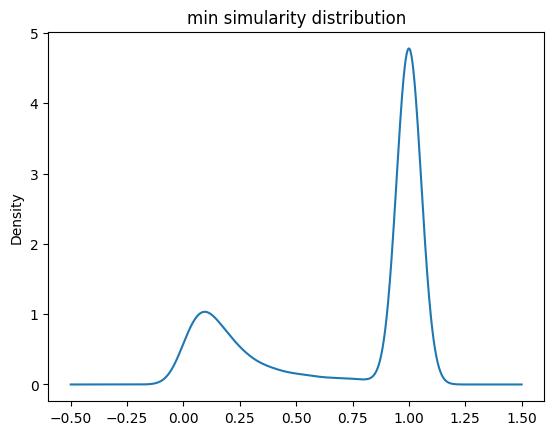

In [184]:
# itemcode_to_itemname['sim'].plot(kind="kde",title="min simularity distribution")

In [188]:
# itemcode_with_low_sim = itemcode_to_itemname[itemcode_to_itemname['sim']  < 0.05]['itemcode']
# itemcode_with_low_sim

0                    1
2                    5
3                    6
10                  18
13                  25
             ...      
18794    9001616203305
18796    9001616205774
18810    9001616702693
18811    9001616702716
18862    9310072028750
Name: itemcode, Length: 1052, dtype: int64

<AxesSubplot: title={'center': 'item codes with simularity less then 0.75'}, ylabel='Density'>

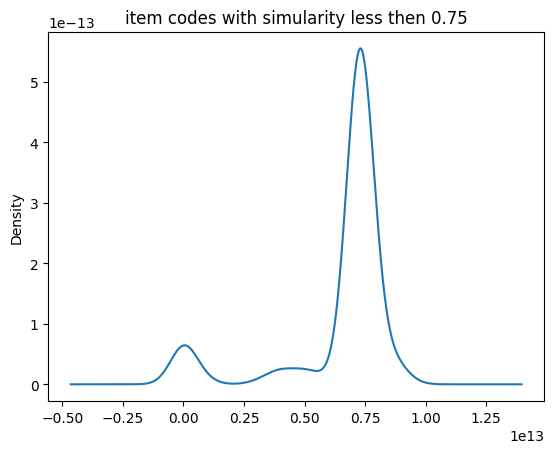

In [189]:
# itemcode_with_low_sim.plot(kind="kde",title="item codes with simularity less then 0.75")

In [190]:
# def collect_details(x):
#     return pd.Series([x['clean_itemname'].unique(), x['chainid'].unique()])

# score_low_on_simularity = prices[prices.itemcode.isin(itemcode_with_low_sim)].groupby(['itemcode']).apply(collect_details)
# score_low_on_simularity.columns = ['names','chanin_selling']
# score_low_on_simularity.head()

,names,chanin_selling
itemcode,,
1,"[עלות משלוח, בד גדול good pharm]","[7290058134977, 7290058197699]"
5,"[תוספת לקרור חב קוקה קולה, לחמניה אנג ל רגילה ...","[7290058134977, 7290058159628]"
6,"[תוספת קירור בקבוק גדול, לחמניה אנג ל שמיניה ב...","[7290058134977, 7290058159628]"
18,"[תבשילים חמים וטעים 29 90 ש ח, חלה ברמן 500 גר]","[7290058198450, 7290058159628]"
25,"[לחמניה מזונות, בקבוק מים קר 1 5 ליטר]","[7290058173198, 7290058198450]"


In [181]:
score_low_on_simularity.to_csv("itemcode_to_itemname.csv")